In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [16]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [63]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [65]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [66]:
len(train),len(test)

(891, 418)

In [75]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


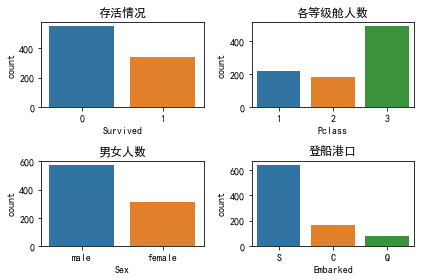

In [88]:
# 中文字体设置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 各属性对应的人数分布
plt.subplot(2,2,1)
sns.countplot(x='Survived', data=train)
plt.title('存活情况')
plt.subplot(2,2,2)
sns.countplot(x='Pclass', data=train)
plt.title('各等级舱人数')
plt.subplot(2,2,3)
sns.countplot(x='Sex', data=train)
plt.title('男女人数')
plt.subplot(2,2,4)
sns.countplot(x='Embarked', data=train)
plt.title('登船港口')
plt.tight_layout()

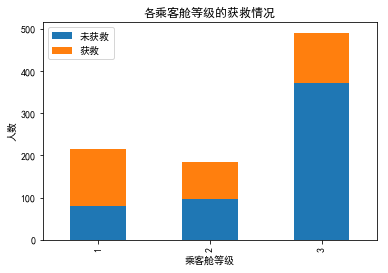

In [90]:
# 舱等级与存活情况之间的关系
Survived_0 = train.Pclass[train.Survived == 0].value_counts()
Survived_1 = train.Pclass[train.Survived == 1].value_counts()
Pclass_df = pd.DataFrame({'未获救': Survived_0, '获救': Survived_1})
Pclass_df.plot(kind='bar', stacked=True)
plt.title('各乘客舱等级的获救情况')
plt.xlabel('乘客舱等级') 
plt.ylabel('人数') 
plt.show()

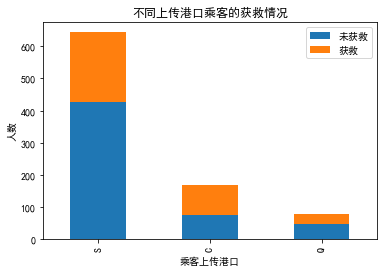

In [91]:
# 上船港口与存活情况之间的关系
Survived_0 = train.Embarked[train.Survived == 0].value_counts()
Survived_1 = train.Embarked[train.Survived == 1].value_counts()
Pclass_df = pd.DataFrame({'未获救': Survived_0, '获救': Survived_1})
Pclass_df.plot(kind='bar', stacked=True)
plt.title('不同上传港口乘客的获救情况')
plt.xlabel('乘客上传港口') 
plt.ylabel('人数') 
plt.show()

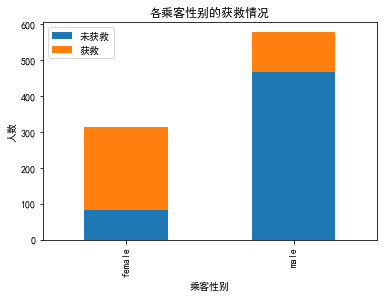

In [92]:
# 性别与存活情况之间的关系
Survived_0 = train.Sex[train.Survived == 0].value_counts()
Survived_1 = train.Sex[train.Survived == 1].value_counts()
Pclass_df = pd.DataFrame({'未获救': Survived_0, '获救': Survived_1})
Pclass_df.plot(kind='bar', stacked=True)
plt.title('各乘客性别的获救情况')
plt.xlabel('乘客性别') 
plt.ylabel('人数') 
plt.show()
# 从堆积直方图可以看出，女性显然更易获救。

F:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
F:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, '各乘客性别的获救情况')

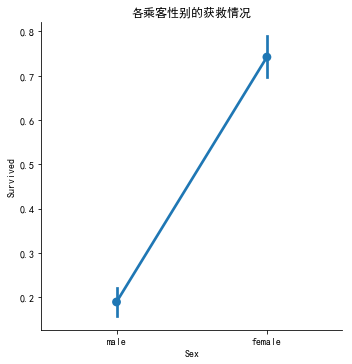

In [93]:
# 为了进一步确认，绘出性别与获救之间的关系
sns.factorplot(x='Sex',y='Survived',data=train)
plt.title('各乘客性别的获救情况')

F:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


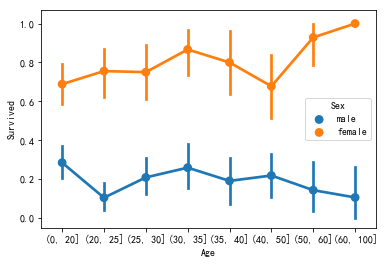

In [94]:
# 不同年龄层的乘客获救情况
df=train[['Age','Sex','Survived']]
bins=[0,20,25,30,35,40,50,60,100]
factor = pd.cut(df['Age'],bins=bins)
sns.pointplot(x=factor, y='Survived',hue='Sex',data=df)
# 各个年龄层女性获救概率都远大于男性，可以初步得出结论，性别对获救与否有很大影响。

In [97]:
# 完成数据的基本探索后，在建立模型之前，我们还需要对数据进行清洗，并且对数据集中缺失的数据进行补全。
# 首先了解数据的缺失情况：
train.info()
print('-'*40)
test.info()
#训练集中有891条数据，而测试集中有418条数据。
#训练集缺失值：Age，Cabin，Embarked，其中Cabin字段缺失数量较多； 测试集缺失值：Age，Cabin，Fare，其中Cabin字段缺失数量较多。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [17]:
# 对数据进行补全
# Cabin属性在测试集和训练集中都缺失过多，可以将这一特征处理成有和无两种属性
train.loc[ train.Cabin.notnull(), 'Cabin' ] = 'Yes'
train.loc[ train.Cabin.isnull(), 'Cabin' ] = 'No'
test.loc[ train.Cabin.notnull(), 'Cabin' ] = 'Yes'
test.loc[ train.Cabin.isnull(), 'Cabin' ] = 'No'
 
# 训练集中的Embarked和测试集中的Fare属性缺失数量较少，采用相应的属性中最多的项或平均值来补全
train['Embarked'].fillna('S', inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)
 
# 用年龄的平均值补全训练集和测试集中的年龄属性
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)
 
train.info()
print('-'*30)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fa

In [18]:
train_dummies_Pclass = pd.get_dummies(train['Pclass'], prefix='Pclass')
test_dummies_Pclass = pd.get_dummies(test['Pclass'], prefix='Pclass')
train_dummies_Sex = pd.get_dummies(train['Sex'], prefix='Sex')
test_dummies_Sex = pd.get_dummies(test['Sex'], prefix='Sex')
train_dummies_SibSp = pd.get_dummies(train['SibSp'], prefix='SibSp')
test_dummies_SibSp = pd.get_dummies(test['SibSp'], prefix='SibSp')
train_dummies_Parch = pd.get_dummies(train['Parch'], prefix='Parch')
test_dummies_Parch = pd.get_dummies(test['Parch'], prefix='Parch')
train_dummies_Cabin = pd.get_dummies(train['Cabin'], prefix='Cabin')
test_dummies_Cabin = pd.get_dummies(test['Cabin'], prefix='Cabin')
train_dummies_Embarked = pd.get_dummies(train['Embarked'], prefix='Embarked')
test_dummies_Embarked = pd.get_dummies(test['Embarked'], prefix='Embarked')

In [19]:
# 将one-hot编码表示的属性拼接在原来的数据集上，保存到train_df和test_df中
train_df = pd.concat([train, train_dummies_Pclass, train_dummies_Sex, train_dummies_SibSp, train_dummies_Parch, train_dummies_Cabin, train_dummies_Embarked], axis=1)
test_df = pd.concat([test, test_dummies_Pclass, test_dummies_Sex, test_dummies_SibSp, test_dummies_Parch, test_dummies_Cabin, test_dummies_Embarked], axis=1)
train_df.drop(['Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked'], axis=1, inplace=True)
test_df.drop(['Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_df['Age'].values.reshape(-1,1))
train_df['Age_scaled'] = scaler.transform(train_df['Age'].values.reshape(-1,1))
test_df['Age_scaled'] = scaler.transform(test_df['Age'].values.reshape(-1,1))
 
scaler.fit(train_df['Fare'].values.reshape(-1,1))
train_df['Fare_scaled'] = scaler.transform(train_df['Fare'].values.reshape(-1,1))
test_df['Fare_scaled'] = scaler.transform(test_df['Fare'].values.reshape(-1,1))
 
train_df.drop(['Age', 'Fare'], axis=1, inplace=True)
test_df.drop(['Age', 'Fare'], axis=1, inplace=True)
 
train_df.head()

,PassengerId,Survived,Name,Ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,...,Parch_4,Parch_5,Parch_6,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Age_scaled,Fare_scaled
0,1,0,"Braund, Mr. Owen Harris",A/5 21171,0,0,1,0,1,0,...,0,0,0,1,0,0,0,1,-0.592481,-0.502445
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0.638789,0.786845
2,3,1,"Heikkinen, Miss. Laina",STON/O2. 3101282,0,0,1,1,0,1,...,0,0,0,1,0,0,0,1,-0.284663,-0.488854
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0.407926,0.420730
4,5,0,"Allen, Mr. William Henry",373450,0,0,1,0,1,1,...,0,0,0,1,0,0,0,1,0.407926,-0.486337


In [21]:
# 采用逻辑回归模型
from sklearn.linear_model import LogisticRegression
 
# 将不需要的Name，Ticket和PassengerId移除
train_df2 = train_df.drop(['Name', 'Ticket','PassengerId'], axis=1)
test_df2 = test_df.drop(['Name', 'Ticket', 'PassengerId'], axis=1)
 
train_df2.info()
print('-'*30)
test_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 27 columns):
Survived       891 non-null int64
Pclass_1       891 non-null uint8
Pclass_2       891 non-null uint8
Pclass_3       891 non-null uint8
Sex_female     891 non-null uint8
Sex_male       891 non-null uint8
SibSp_0        891 non-null uint8
SibSp_1        891 non-null uint8
SibSp_2        891 non-null uint8
SibSp_3        891 non-null uint8
SibSp_4        891 non-null uint8
SibSp_5        891 non-null uint8
SibSp_8        891 non-null uint8
Parch_0        891 non-null uint8
Parch_1        891 non-null uint8
Parch_2        891 non-null uint8
Parch_3        891 non-null uint8
Parch_4        891 non-null uint8
Parch_5        891 non-null uint8
Parch_6        891 non-null uint8
Cabin_No       891 non-null uint8
Cabin_Yes      891 non-null uint8
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
Age_scaled     891 non-null float64
Fare_scal

In [22]:
train_df2_colValue = train_df2.columns.values
train_df2_colValue_X = train_df2_colValue[1:]
train_df2_colValue_y = train_df2_colValue[0]
 
test_df2_colValue_X = test_df2.columns.values
 
print('train_df2_colValue_X:', train_df2_colValue_X)
print('train_df2_colValue_y:', train_df2_colValue_y)
print('test_df2_colValue_X:', test_df2_colValue_X)

train_df2_colValue_X: ['Pclass_1' 'Pclass_2' 'Pclass_3' 'Sex_female' 'Sex_male' 'SibSp_0'
 'SibSp_1' 'SibSp_2' 'SibSp_3' 'SibSp_4' 'SibSp_5' 'SibSp_8' 'Parch_0'
 'Parch_1' 'Parch_2' 'Parch_3' 'Parch_4' 'Parch_5' 'Parch_6' 'Cabin_No'
 'Cabin_Yes' 'Embarked_C' 'Embarked_Q' 'Embarked_S' 'Age_scaled'
 'Fare_scaled']
train_df2_colValue_y: Survived
test_df2_colValue_X: ['Pclass_1' 'Pclass_2' 'Pclass_3' 'Sex_female' 'Sex_male' 'SibSp_0'
 'SibSp_1' 'SibSp_2' 'SibSp_3' 'SibSp_4' 'SibSp_5' 'SibSp_8' 'Parch_0'
 'Parch_1' 'Parch_2' 'Parch_3' 'Parch_4' 'Parch_5' 'Parch_6' 'Parch_9'
 'Cabin_Yes' 'Embarked_C' 'Embarked_Q' 'Embarked_S' 'Age_scaled'
 'Fare_scaled']


In [23]:
# 训练模型
lr = LogisticRegression()
lr.fit(train_df2[train_df2_colValue_X], train_df2[train_df2_colValue_y])

F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
# 对测试集进行预测
predictions = lr.predict(test_df2[test_df2_colValue_X])

In [25]:
# 创造提交文件
ids = test["PassengerId"]
submission_df = {"PassengerId": ids,
                 "Survived": predictions}
submission = pd.DataFrame(submission_df)
 
submission.to_csv("submission_Titanic.csv", index=False)

In [26]:
# 模型关联系数分析
coef = pd.DataFrame({'columns':train_df2_colValue_X, 'coef':list(lr.coef_.T)})
coef
# 头等舱可以很好的提升获救率，而三等舱与获救率则有着明显的负相关，女性与获救率之间则有着明显的正相关等

,columns,coef
0,Pclass_1,[0.4864073751332947]
1,Pclass_2,[0.1783843258714842]
2,Pclass_3,[-0.8916804419735889]
3,Sex_female,[1.178440160284689]
4,Sex_male,[-1.4053289012535337]
5,SibSp_0,[0.8031820685820591]
6,SibSp_1,[0.8831287504277201]
7,SibSp_2,[0.47230138335085375]
8,SibSp_3,[-0.7997276935995006]
9,SibSp_4,[-0.4080714049551609]


In [29]:
# 交叉验证
from sklearn import model_selection
 
scores = model_selection.cross_val_score(lr, train_df2[train_df2_colValue_X], train_df2[train_df2_colValue_y], cv=10)
accuracy = np.mean(scores)
print('cross_val_score:', scores)
print('mean cross_val_score:', accuracy)

cross_val_score: [0.81111111 0.81111111 0.79775281 0.83146067 0.79775281 0.78651685
 0.82022472 0.82022472 0.83146067 0.82954545]
mean cross_val_score: 0.8137160935194643


F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages

F:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver t

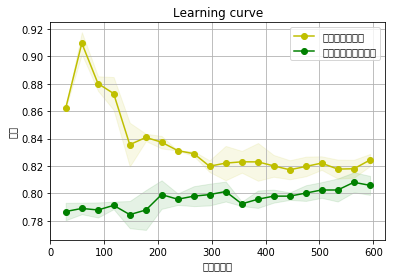

In [31]:
#  通过learning curve大致判断模型是否过拟合
from sklearn.model_selection  import learning_curve
 
# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, X, y, title='Learning curve', cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    绘出data在某模型上的learning curve.
    ----------
    输入参数：
    estimator : 用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    train_sizes:训练样本的相对的或绝对的数字
    verbose: 控制冗余,越高，有越多的信息
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
 
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
 
    if plot:
        plt.figure()
        plt.title(title)
        plt.xlabel('训练样本数')
        plt.ylabel('得分')
        plt.grid()
        
        plt.plot(train_sizes, train_scores_mean, 'o-', color="y", label='训练集上的得分')
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label='交叉验证集上的得分')
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="y")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="g")
 
        plt.legend(loc='best')
 
        plt.show()
 
    return None
 
 
plot_learning_curve(lr,train_df2[train_df2_colValue_X], train_df2[train_df2_colValue_y])

# 当过拟合时，模型在训练集上的得分将远大于在交叉验证集上的得分
# 因此从图上可以看出，模型没有明显的过拟合现象